### Challenge Set 3
Topic: Linear Splitting<br>
Date: 08/01/2016<br>
Name: Seth Kaufman

In [186]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn import learning_curve 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import scale, normalize
from sklearn.cross_validation import train_test_split, ShuffleSplit, cross_val_score

from collections import defaultdict
import seaborn as sns
import pandas as pd
import numpy as np
import brewer2mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

### Classification Error Metric Challenges

**Settings:  Where applicable, use test_size=0.30, random_state=4444.  This will permit comparison of results across users.

*These reference the Classification Challenges.*


#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [148]:
hr = pd.read_csv('/Users/Seth/Documents/Data Science/Metis/nyc16_ds8/challenges/challenges_data/house-votes-84.data',
                 header=-1,na_values='?')
hr.replace({'y':1,'n':0},inplace=True)
hr[16]=hr[16].apply(lambda x : ''.join([i for i in x if i.isalpha()]))
hr[16] = hr[16]=='democrat'
hr = hr.fillna(hr.mean(axis=0))
X,y = hr.iloc[:,0:-1],hr.iloc[:,-1]
xtrain, xtest, ytrain, ytest = train_test_split(scale(X),y,test_size=.30, random_state=4444)
lr = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=7,p=1,algorithm='brute')
gnb = GaussianNB()

In [149]:
lr.fit(xtrain,ytrain)
svc.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)
dt.fit(xtrain,ytrain)
knn.fit(xtrain,ytrain)
gnb.fit(xtrain,ytrain)

print('~Logistic Regression~', classification_report(ytest,lr.predict(xtest)), 
      '~SVC~', classification_report(ytest,svc.predict(xtest)),
      '~Random Forests~', classification_report(ytest,rf.predict(xtest)),
      '~Decision Tree~', classification_report(ytest,dt.predict(xtest)),
      '~K - Neighbors Classifier~', classification_report(ytest,knn.predict(xtest)),
      '~GaussianNB~', classification_report(ytest,gnb.predict(xtest)),
      sep='\n')

~Logistic Regression~
             precision    recall  f1-score   support

      False       0.96      0.89      0.92        54
       True       0.93      0.97      0.95        77

avg / total       0.94      0.94      0.94       131

~SVC~
             precision    recall  f1-score   support

      False       0.96      0.91      0.93        54
       True       0.94      0.97      0.96        77

avg / total       0.95      0.95      0.95       131

~Random Forests~
             precision    recall  f1-score   support

      False       0.98      0.91      0.94        54
       True       0.94      0.99      0.96        77

avg / total       0.96      0.95      0.95       131

~Decision Tree~
             precision    recall  f1-score   support

      False       0.96      0.89      0.92        54
       True       0.93      0.97      0.95        77

avg / total       0.94      0.94      0.94       131

~K - Neighbors Classifier~
             precision    recall  f1-score   support


#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [179]:
def roc_plot(est, title, tree=None):
    if tree != None:
        score = rf.predict_proba(xtest)[:,1]
        fpr, tpr, _ = roc_curve(ytest,score)
        plt.plot(fpr, tpr, label='ROC curve')
        plt.plot([0, 1], [0, 1], 'k--')
    else:
        score = est.decision_function(xtest)
        fpr, tpr, _ = roc_curve(ytest.astype(int),score)
        plt.plot(fpr, tpr, label='ROC curve')
        plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for %s' % title)
    plt.legend()
    return plt.show()

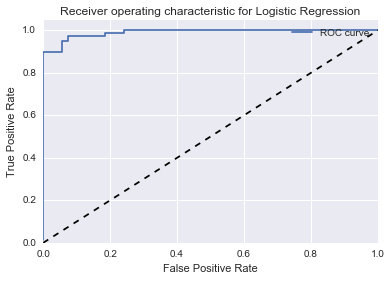

In [180]:
roc_plot(lr,'Logistic Regression')

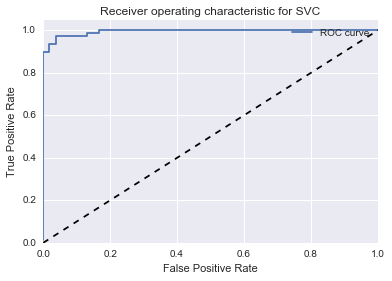

In [181]:
roc_plot(svc,'SVC')

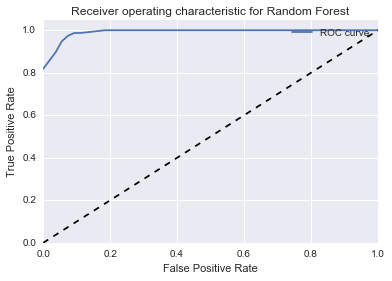

In [182]:
roc_plot(rf.predict_proba, 'Random Forest','hey')

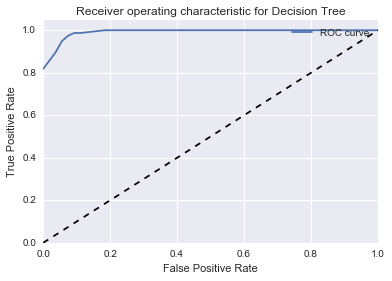

In [183]:
roc_plot(dt, 'Decision Tree','hey')

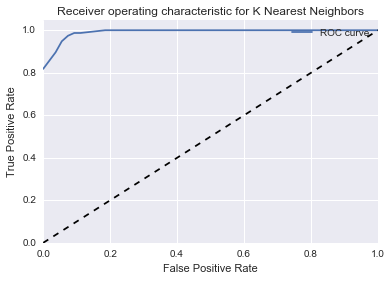

In [184]:
roc_plot(knn, 'K Nearest Neighbors','hey')

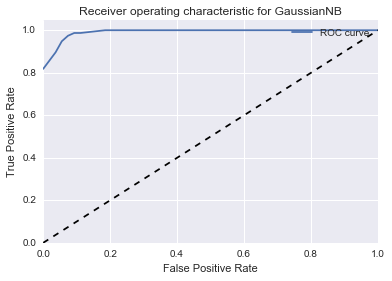

In [185]:
roc_plot(gnb, 'GaussianNB','hey')

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).



In [197]:
cv = ShuffleSplit(len(X), test_size=.3,random_state=4444)
print('~Logistic Regression~', cross_val_score(LogisticRegression(),X,y,cv=cv).mean(), 
      '~SVC~', cross_val_score(SVC(),X,y,cv=cv).mean(), 
      '~Random Forests~', cross_val_score(RandomForestClassifier(),X,y,cv=cv).mean(), 
      '~Decision Tree~', cross_val_score(DecisionTreeClassifier(),X,y,cv=cv).mean(), 
      '~K - Neighbors Classifier~', cross_val_score(KNeighborsClassifier(n_neighbors=7,p=1,algorithm='brute'),X,y,cv=cv).mean(), 
      '~GaussianNB~', cross_val_score(LogisticRegression(),X,y,cv=cv).mean(), 
      sep='\n')

~Logistic Regression~
0.964122137405
~SVC~
0.962595419847
~Random Forests~
0.951145038168
~Decision Tree~
0.936641221374
~K - Neighbors Classifier~
0.940458015267
~GaussianNB~
0.964122137405


#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [255]:
mojo = pd.read_csv('/Users/Seth/Documents/Data Science/Metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv',
                   parse_dates=['ReleaseDate'],infer_datetime_format=True)
mojo['ReleaseDate'] = pd.Categorical(mojo['ReleaseDate'])
mojo['ReleaseDate'] = mojo['ReleaseDate'].dt.month
mojo['Budget'] = mojo['Budget'].fillna(mojo['Budget'].mean(axis=0))
predictors = mojo[
    [#'Title',
     'Budget',
     'DomesticTotalGross',
     #'Director',
     'Runtime',
     'ReleaseDate']]
X = pd.get_dummies(predictors)
y = (mojo['Rating'].factorize()[0]==0).astype(int)

In [256]:
lr = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=7,p=1,algorithm='brute')
gnb = GaussianNB()

In [257]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X),y,test_size=.30, random_state=4444)
lr.fit(xtrain,ytrain)
print('~Logistic Regression~', classification_report(ytest,lr.predict(xtest)),sep='\n')

~Logistic Regression~
             precision    recall  f1-score   support

          0       0.68      0.81      0.74        16
          1       0.73      0.57      0.64        14

avg / total       0.70      0.70      0.69        30



/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [258]:
xtrain, xtest, ytrain, ytest = train_test_split(scale(X),y,test_size=.30, random_state=4444)
svc.fit(xtrain,ytrain)
print('~Logistic Regression~', classification_report(ytest,svc.predict(xtest)),sep='\n')

~Logistic Regression~
             precision    recall  f1-score   support

          0       0.67      0.75      0.71        16
          1       0.67      0.57      0.62        14

avg / total       0.67      0.67      0.66        30



/Users/Seth/Applications/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [259]:
dt.fit(xtrain,ytrain)
print('~Decision Tree~', classification_report(ytest,dt.predict(xtest)))

~Decision Tree~              precision    recall  f1-score   support

          0       0.50      0.38      0.43        16
          1       0.44      0.57      0.50        14

avg / total       0.47      0.47      0.46        30



In [260]:
rf.fit(xtrain,ytrain)
print('~Random Forests~', classification_report(ytest,rf.predict(xtest)))

~Random Forests~              precision    recall  f1-score   support

          0       0.75      0.75      0.75        16
          1       0.71      0.71      0.71        14

avg / total       0.73      0.73      0.73        30



In [261]:
knn.fit(xtrain,ytrain)
print('~K - Neighbors Classifier~', classification_report(ytest,knn.predict(xtest)))

~K - Neighbors Classifier~              precision    recall  f1-score   support

          0       0.62      0.62      0.62        16
          1       0.57      0.57      0.57        14

avg / total       0.60      0.60      0.60        30



In [263]:
gnb.fit(xtrain,ytrain)
print('~GaussianNB~', classification_report(ytest,gnb.predict(xtest)))

~GaussianNB~              precision    recall  f1-score   support

          0       0.67      0.75      0.71        16
          1       0.67      0.57      0.62        14

avg / total       0.67      0.67      0.66        30




#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.






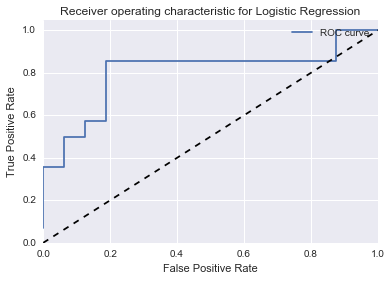

In [264]:
roc_plot(lr,'Logistic Regression')

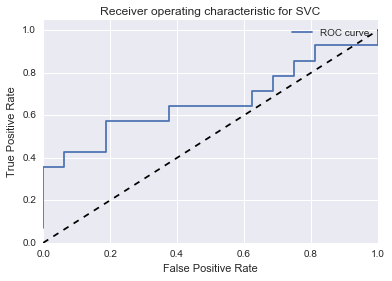

In [265]:
roc_plot(svc,'SVC')

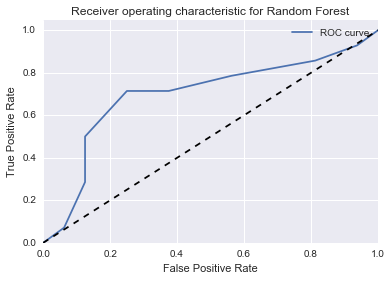

In [266]:
roc_plot(rf.predict_proba, 'Random Forest','hey')

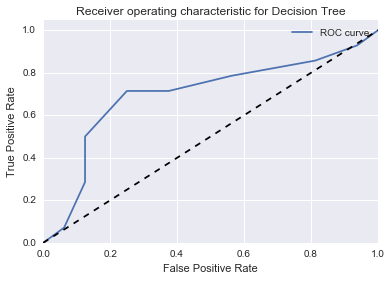

In [267]:
roc_plot(dt, 'Decision Tree','hey')

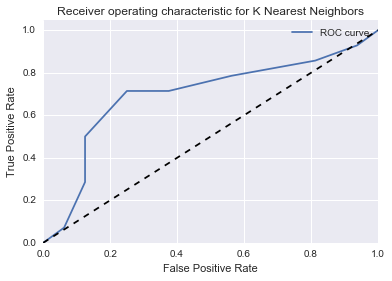

In [268]:
roc_plot(knn, 'K Nearest Neighbors','hey')

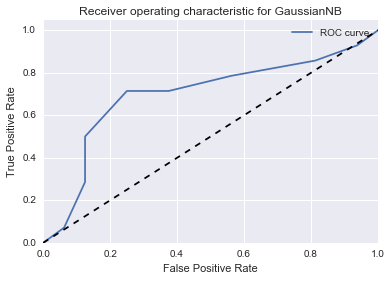

In [269]:
roc_plot(gnb, 'GaussianNB','hey')